In [1]:
%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np
import matplotlib.pyplot as plt

LOG.propagate = False

In [2]:
# Get ArtemisBLEController object
ble = get_ble_controller()

# Connect to the Artemis Device
ble.connect()

2023-03-20 16:59:50,375 | INFO     |: Looking for Artemis Nano Peripheral Device: C0:83:b1:6a:38:3C
2023-03-20 17:00:00,422 | ERROR    |: Device with address C0:83:b1:6a:38:3C was not found.
2023-03-20 17:00:01,432 | WARNING  |: Attempting to connect again...
2023-03-20 17:00:01,434 | INFO     |: Looking for Artemis Nano Peripheral Device: C0:83:b1:6a:38:3C
2023-03-20 17:00:05,459 | ERROR    |: Could not get GATT characteristics for <_bleak_winrt_Windows_Devices_Bluetooth_GenericAttributeProfile.GattDeviceService object at 0x000001E1605554B0>: Access Denied
2023-03-20 17:00:06,466 | WARNING  |: Attempting to connect again...
2023-03-20 17:00:06,467 | INFO     |: Looking for Artemis Nano Peripheral Device: C0:83:b1:6a:38:3C
2023-03-20 17:00:09,348 | INFO     |: Connected to C0:83:b1:6a:38:3C


D:\Workspace\ECE-5160-Sp23\ble_robot-1.1\ble_python\base_ble.py:87: FutureWarning: This method will be removed future version, pass the callback to the BleakClient constructor instead.
  self.client.set_disconnected_callback(self.disconnect_handler)


In [3]:
def get_data_cb(uuid, byte_array):
    global tof_list, pwm_list
    if byte_array is not None:
        s = byte_array.decode("utf-8")
        s = s.split("|")  # split each reading
        
        if s[0] == 'T':
            # TOF
            readings = s[1].split(',')[:-1]
            for data in readings:
                data = data.split('&')
                time = int(data[0])
                tof  = int(data[1])
                if tof > 0:
                    tof_time_list.append(time)
                    tof_data_list.append(tof)
        else:
            # PWM
            readings = s[1].split(',')[:-1]
            for data in readings:
                data = data.split('&')
                time = int(data[0])
                pwm  = int(data[1])
                if pwm > 0:
                    pwm_time_list.append(time)
                    pwm_data_list.append(pwm)

In [4]:
ble.start_notify(ble.uuid['RX_STRING'], get_data_cb)

In [5]:
tof_data_list = []
pwm_data_list = []
tof_time_list = []
pwm_time_list = []


In [6]:
# start
ble.send_command(CMD.SEND_TWO_INTS, "")

In [7]:
# stop
ble.send_command(CMD.SEND_THREE_FLOATS, "")

In [8]:
ble.stop_notify(ble.uuid['RX_STRING'])

In [9]:
tof_time_list = [x - tof_time_list[0] for x in tof_time_list]
pwm_time_list = [x - pwm_time_list[0] for x in pwm_time_list]

In [10]:
print(tof_data_list)
print(tof_time_list)

[1248, 1243, 1224, 1199, 1183, 1163, 1145, 1132, 1104, 1069, 1040, 1014, 976, 953, 929, 895, 860, 825, 788, 757, 720, 684, 649, 615, 580, 548, 515, 483, 451, 417, 392, 364, 345, 324, 313, 304, 296, 289, 278, 267, 257, 248, 239, 233, 227, 225, 221, 224, 222, 221, 220, 220, 222, 220, 221, 221, 220, 223, 222, 221, 222, 223, 222, 221, 220, 222, 221, 221, 222, 223, 222, 222, 222, 221, 222, 221, 221, 220, 220, 220, 222, 222, 221, 220, 220, 221, 223]
[0, 62, 139, 206, 268, 333, 395, 457, 520, 585, 649, 715, 777, 847, 908, 976, 1045, 1116, 1178, 1241, 1307, 1365, 1426, 1484, 1544, 1607, 1663, 1728, 1793, 1856, 1918, 1976, 2043, 2111, 2174, 2238, 2307, 2368, 2434, 2501, 2568, 2635, 2699, 2765, 2831, 2893, 2970, 3034, 3095, 3157, 3216, 3282, 3350, 3417, 3479, 3540, 3608, 3675, 3736, 3810, 3877, 3934, 4000, 4067, 4129, 4195, 4254, 4319, 4384, 4458, 4523, 4595, 4658, 4726, 4790, 4854, 4914, 4982, 5048, 5112, 5173, 5234, 5294, 5354, 5421, 5486, 5546]


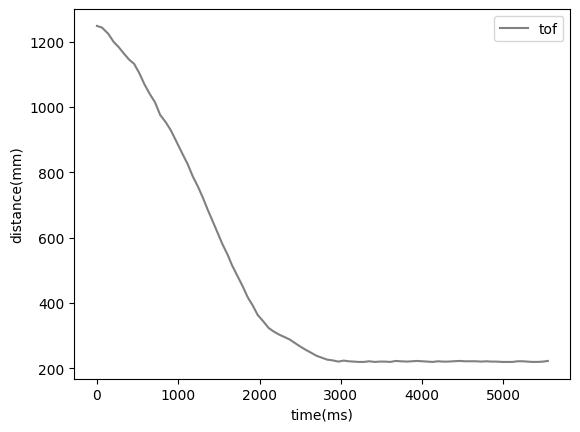

In [11]:
plt.plot(tof_time_list, tof_data_list, color='gray', label='tof')
plt.legend(loc="upper right")
plt.xlabel('time(ms)')
plt.ylabel('distance(mm)')
plt.show()

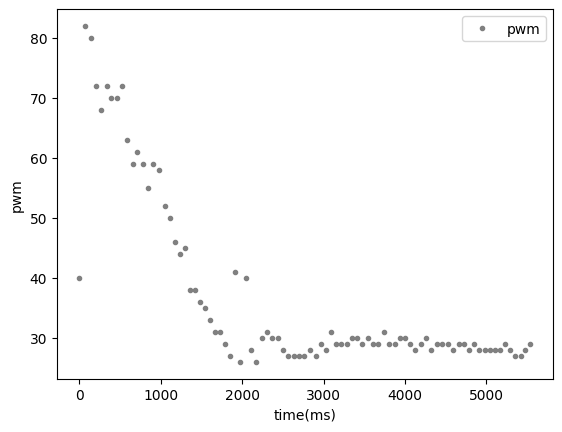

2023-03-20 17:02:06,233 | INFO     |: Disconnected from C0:83:b1:6a:38:3C


In [12]:
plt.plot(pwm_time_list, pwm_data_list, '.', color='gray', label='pwm')
plt.legend(loc="upper right")
plt.xlabel('time(ms)')
plt.ylabel('pwm')
plt.show()

In [ ]:
# Disconnect
ble.disconnect()